# UV plane of interferometry

The UV plane is a convolution of the aperature of the interferometer. The aperature plane is physically the dishes, and their combination.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (3, 2)

## Aperature of an array with redundant baselines

Imagine an array with 12 elements where 3 elements are redundant in groups of 4.

(-1, 4)

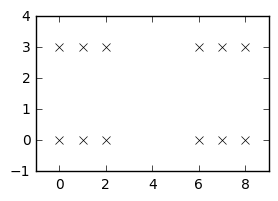

In [2]:
x,y = np.linspace(0,8,num=9,dtype=int),np.linspace(0,3,num=4,dtype=int)
ants = [[1,1,1,0,0,0,1,1,1],list(np.zeros(9,dtype=int)),list(np.zeros(9,dtype=int)),[1,1,1,0,0,0,1,1,1]]

fig,ax = plt.subplots(1,1)
for l in x:
    for m in y:
        if ants[m][l]:
            ax.plot(l,m,'k',marker='x')
ax.set_xlim([-1,9])
ax.set_ylim([-1,4])

In [ ]:
np.convolve